# Predicting Daily Water Temperature in Oconaluftee River Using TBATS, ARIMA, and FaceBook "Prophet" Models

<center> Qitong Luan
<center>April 2021

## Objectives

This project aims to predict the general behavior of the water temperature of the Oconaluftee River in North Carolina so that hydrologists can attain a better understanding of the water quality and safety of this river. The project uses the water temperature data in 2019 and 2020 as the testing criteria for this model.  

Updates (August 2022): This notebook was completed on 04/03/2022. For some reasons, several valid data points from that time now becomes nan. To successfully run the analysis in this notebook, you may find it helpful to use my saved query dataset [here](https://drive.google.com/file/d/17kX5A3SpCAHmUHvYISY35WnasC09oCEo/view?usp=sharing).

 ### Prepare Data Set 

In [ ]:
import pandas as pd
import numpy as np
import hydrofunctions as hf
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_absolute_error

In [ ]:
new = hf.NWIS('03512000', 'iv', start_date='2014-12-31', end_date='2020-12-31')
new

Requested data from https://nwis.waterservices.usgs.gov/nwis/iv/?format=json%2C1.1&sites=03512000&startDT=2014-12-31&endDT=2020-12-31


USGS:03512000: OCONALUFTEE RIVER AT BIRDTOWN, NC
    00010: <15 * Minutes>  Temperature, water, degrees Celsius
    00060: <15 * Minutes>  Discharge, cubic feet per second
    00065: <15 * Minutes>  Gage height, feet
    00095: <15 * Minutes>  Specific conductance, water, unfiltered, microsiemens per centimeter at 25 degrees Celsius
    00300: <15 * Minutes>  Dissolved oxygen, water, unfiltered, milligrams per liter
    00400: <15 * Minutes>  pH, water, unfiltered, field, standard units
    63680: <15 * Minutes>  Turbidity, water, unfiltered, monochrome near infra-red LED light, 780-900 nm, detection angle 90 +-2.5 degrees, formazin nephelometric units (FNU)
    99137: <15 * Minutes>  Nitrate, water, in situ, milligrams per liter as nitrogen
Start: 2014-12-31 05:00:00+00:00
End:   2021-01-01 04:45:00+00:00

In [ ]:
new = new.df()

In [ ]:
new

,USGS:03512000:00010:00000,USGS:03512000:00010:00000_qualifiers,USGS:03512000:00060:00000,USGS:03512000:00060:00000_qualifiers,USGS:03512000:00065:00000,USGS:03512000:00065:00000_qualifiers,USGS:03512000:00095:00000,USGS:03512000:00095:00000_qualifiers,USGS:03512000:00300:00000,USGS:03512000:00300:00000_qualifiers,USGS:03512000:00400:00000,USGS:03512000:00400:00000_qualifiers,USGS:03512000:63680:00000,USGS:03512000:63680:00000_qualifiers,USGS:03512000:99137:00000,USGS:03512000:99137:00000_qualifiers
datetimeUTC,,,,,,,,,,,,,,,,
2014-12-31 05:00:00+00:00,7.8,A,458.0,A,1.83,A,18.0,A,11.1,A,6.5,A,4.6,A,0.22,A
2014-12-31 05:15:00+00:00,7.7,A,458.0,A,1.83,A,18.0,A,11.1,A,6.5,A,4.6,A,0.22,A
2014-12-31 05:30:00+00:00,7.7,A,458.0,A,1.83,A,18.0,A,11.1,A,6.5,A,4.6,A,0.22,A
2014-12-31 05:45:00+00:00,7.7,A,453.0,A,1.82,A,18.0,A,11.2,A,6.5,A,4.5,A,0.23,A
2014-12-31 06:00:00+00:00,7.6,A,453.0,A,1.82,A,18.0,A,11.2,A,6.5,A,4.5,A,0.23,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01 03:45:00+00:00,9.1,A,684.0,A,2.12,A,18.0,A,10.8,A,6.8,A,1.4,A,0.17,P
2021-01-01 04:00:00+00:00,9.1,A,684.0,A,2.12,A,18.0,A,10.8,A,6.8,A,1.2,A,0.17,P
2021-01-01 04:15:00+00:00,9.1,A,684.0,A,2.12,A,18.0,A,10.8,A,6.8,A,1.2,A,0.17,P


### Data Cleaning

Text(0, 0.5, 'Temperature (in degrees Celcius)')

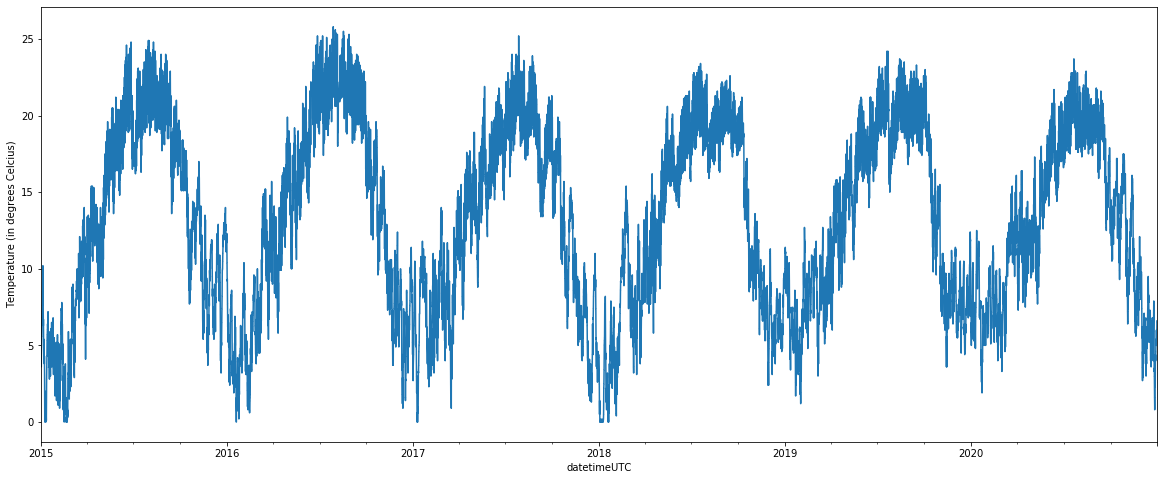

In [ ]:
#Run Sequence Plot
new['USGS:03512000:00010:00000'].loc['2015-01-01 00:00:00+00:00':'2020-12-31 00:00:00+00:00'].plot(figsize=(20,8))
plt.ylabel('Temperature (in degrees Celcius)')

(-10, 30)

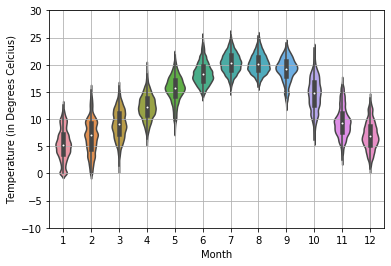

In [ ]:
# violinplot of months to determine variance and range
sns.violinplot(x= new['USGS:03512000:00010:00000'].loc['2015-01-01 00:00:00+00:00':'2020-12-31 00:00:00+00:00'].index.month, y= new['USGS:03512000:00010:00000'].loc['2015-01-01 00:00:00+00:00':'2020-12-31 00:00:00+00:00'])
plt.grid(b=True);
plt.xlabel('Month')
plt.ylabel('Temperature (in Degrees Celcius)')
plt.ylim((-10, 30))

(-10, 30)

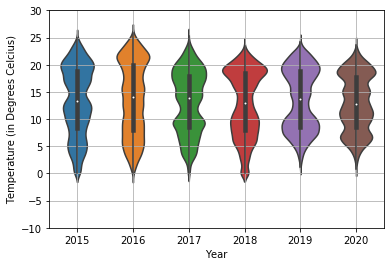

In [ ]:
# violinplot of years to determine variance and range
sns.violinplot(x= new['USGS:03512000:00010:00000'].loc['2015-01-01 00:00:00+00:00':'2020-12-31 00:00:00+00:00'].index.year, y= new['USGS:03512000:00010:00000'].loc['2015-01-01 00:00:00+00:00':'2020-12-31 00:00:00+00:00'])
plt.grid(b=True);
plt.xlabel('Year')
plt.ylabel('Temperature (in Degrees Celcius)')
plt.ylim((-10, 30))

From the monthly and yearly violin plots the montly variances are relatively close to each other and the yearly trend stays constantly zero. We can also see that a yearly seasonality is present in this dataset. 

In [ ]:
#For the purpose of this project, I only be using the daily temperature data from 2015-01-01 to 2020-12-31. The data points are all measured at 00:00. 
temp_daily = new['USGS:03512000:00010:00000'][76::96]
temp_daily

datetimeUTC
2015-01-01 00:00:00+00:00    6.6
2015-01-02 00:00:00+00:00    4.9
2015-01-03 00:00:00+00:00    6.7
2015-01-04 00:00:00+00:00    8.5
2015-01-05 00:00:00+00:00    9.9
                            ... 
2020-12-28 00:00:00+00:00    4.4
2020-12-29 00:00:00+00:00    5.3
2020-12-30 00:00:00+00:00    5.8
2020-12-31 00:00:00+00:00    6.6
2021-01-01 00:00:00+00:00    9.1
Freq: 1440T, Name: USGS:03512000:00010:00000, Length: 2193, dtype: float64

In [ ]:
temp_daily.describe()

count    2193.000000
mean       14.213193
std         6.123835
min         0.000000
25%         9.000000
50%        14.400000
75%        19.800000
max        25.400000
Name: USGS:03512000:00010:00000, dtype: float64

The data points from 2015 to 2018 are used as tarining data. The data points in 2019 and 2020 are used as testing data.

In [ ]:
temp_train = temp_daily.loc[:'2018-12-31 00:00:00+00:00']
temp_test = temp_daily.loc['2019-01-01 00:00:00+00:00':'2020-12-31 00:00:00+00:00']

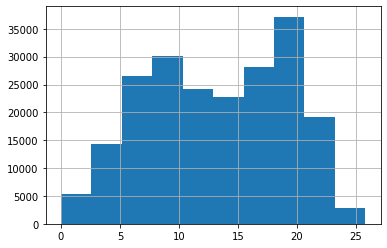

In [ ]:
pd.Series(new['USGS:03512000:00010:00000']).hist()

## TBATS Model
Since the yearly seasonality have a period of 365.25 days, the resuglar SARIMA model is not able to handle it. Therefore, a TBATS model is implemented. https://pypi.org/project/tbats/#description 

pip install tbats

In [ ]:
from tbats import TBATS, BATS
# Fit the model
estimator = TBATS(seasonal_periods=(1, 365.25))
tbats_model = estimator.fit(temp_train)
tbats_model.summary()

/opt/anaconda3/lib/python3.7/site-packages/tbats/error/ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)


'Use Box-Cox: False\nUse trend: True\nUse damped trend: True\nSeasonal periods: [365.25]\nSeasonal harmonics [1]\nARMA errors (p, q): (0, 0)\nSmoothing (Alpha): 1.165468\nTrend (Beta): -0.222876\nDamping Parameter (Phi): 0.800000\nSeasonal Parameters (Gamma): [-1.05141018e-07 -1.91081706e-07]\nAR coefficients []\nMA coefficients []\nSeed vector [ 16.96544647  -0.40538049 -11.22604079  -2.67263199]\n\nAIC 11365.890632'

## ARIMA Model with Fourier Terms
Alternatively, an ARIMA model with Fourier terms can be used to model complex seasonality. I used one with 2 terms as suggested by https://medium.com/intive-developers/forecasting-time-series-with-multiple-seasonalities-using-tbats-in-python-398a00ac0e8a.

### Feature Engineering
Datetime objects are helful, but for my purpose, I converted them to signals using foruier seies.

In [ ]:
edoy = temp_daily.loc[:'2020-12-31 00:00:00+00:00'].index.dayofyear.values
edoy

array([  1,   2,   3, ..., 364, 365, 366])

In [ ]:
exog_temp = pd.DataFrame(temp_daily.loc[:'2020-12-31 00:00:00+00:00'])
exog_temp['sin365'] = np.sin(2 * np.pi * edoy / 365.25)
exog_temp['cos365'] = np.cos(2 * np.pi * edoy / 365.25)
exog_temp['sin365_2'] = np.sin(4 * np.pi * edoy / 365.25)
exog_temp['cos365_2'] = np.cos(4 * np.pi * edoy / 365.25)
exog_temp_to_train = exog_temp.loc[:'2018-12-31 00:00:00+00:00'].drop(columns=['USGS:03512000:00010:00000'])
exog_temp_to_test = exog_temp.loc['2019-01-01 00:00:00+00:00':].drop(columns=['USGS:03512000:00010:00000'])

### Determing the p and q Orders
The auto arima function that uses AIC and BUC as selecting criterions are helpful, but they tend to over-fit the model. Therefore, traditional ACF plot and PACF plot are used to help with the selection. 

In [ ]:
import statsmodels.api as sm

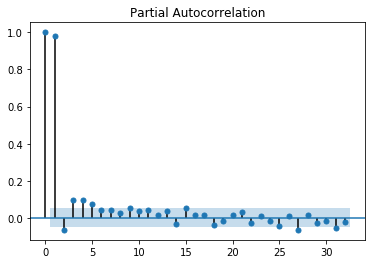

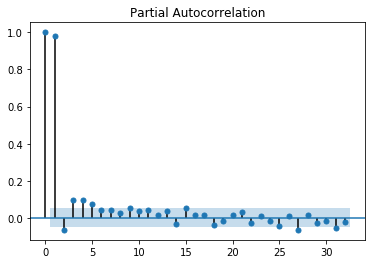

In [ ]:
sm.tsa.graphics.plot_pacf(temp_train)

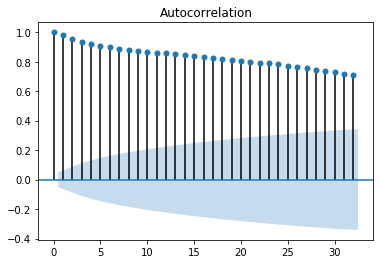

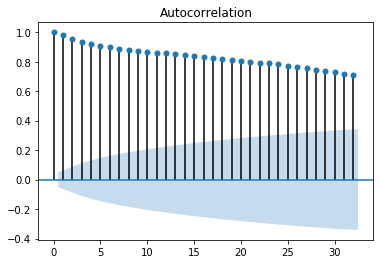

In [ ]:
sm.tsa.graphics.plot_acf(temp_train)

According to the PACF, we can see that the first 2 lags are significant; therefore, I used 2 AR terms in my model. Accroding to the ACF, we can see that the function has significant values at high lags. However, it is recommended that the total oder of the model should not be greater than 5 (https://people.duke.edu/~rnau/411arim3.htm). Therefore, a q order 2 was used.  

In [ ]:
# Fit model
arima_temp = arima_temp = sm.tsa.statespace.SARIMAX(temp_train, exog=exog_temp_to_train, order=(2,1,2)).fit()

In [ ]:
arima_temp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     USGS:03512000:00010:00000   No. Observations:                 1461
Model:                      SARIMAX(2, 1, 2)   Log Likelihood               -2394.494
Date:                       Sat, 03 Apr 2021   AIC                           4806.988
Time:                               13:51:05   BIC                           4854.564
Sample:                           01-01-2015   HQIC                          4824.736
                                - 12-31-2018                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sin365        -3.1785      0.265    -11.975      0.000      -3.699      -2.658
cos365        -7.7514      0.256    -30.279      0.000      -8.253      -7.250
sin365_2       0.3398      0.239      1.424      0.154      -0.128       0.807
cos365_2      -0.7761      0.238     -3.259      0.001      -1.243      -0.309
ar.L1          0.9247      0.179      5.168      0.000       0.574       1.275
ar.L2         -0.1295      0.150     -0.865      0.387      -0.423       0.164
ma.L1         -0.9769      0.180     -5.420      0.000      -1.330      -0.624
ma.L2         -0.0159      0.179     -0.088      0.930      -0.368       0.336
sigma2         1.5538      0.053     29.287      0.000       1.450       1.658
===================================================================================
Ljung-Box (Q):                       31.17   Jarque-Bera (JB):                45.37
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                            -0.36
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

From the diagnostics plot, we can see that the modeled residuals behave like white noise. Therefore, the model works.

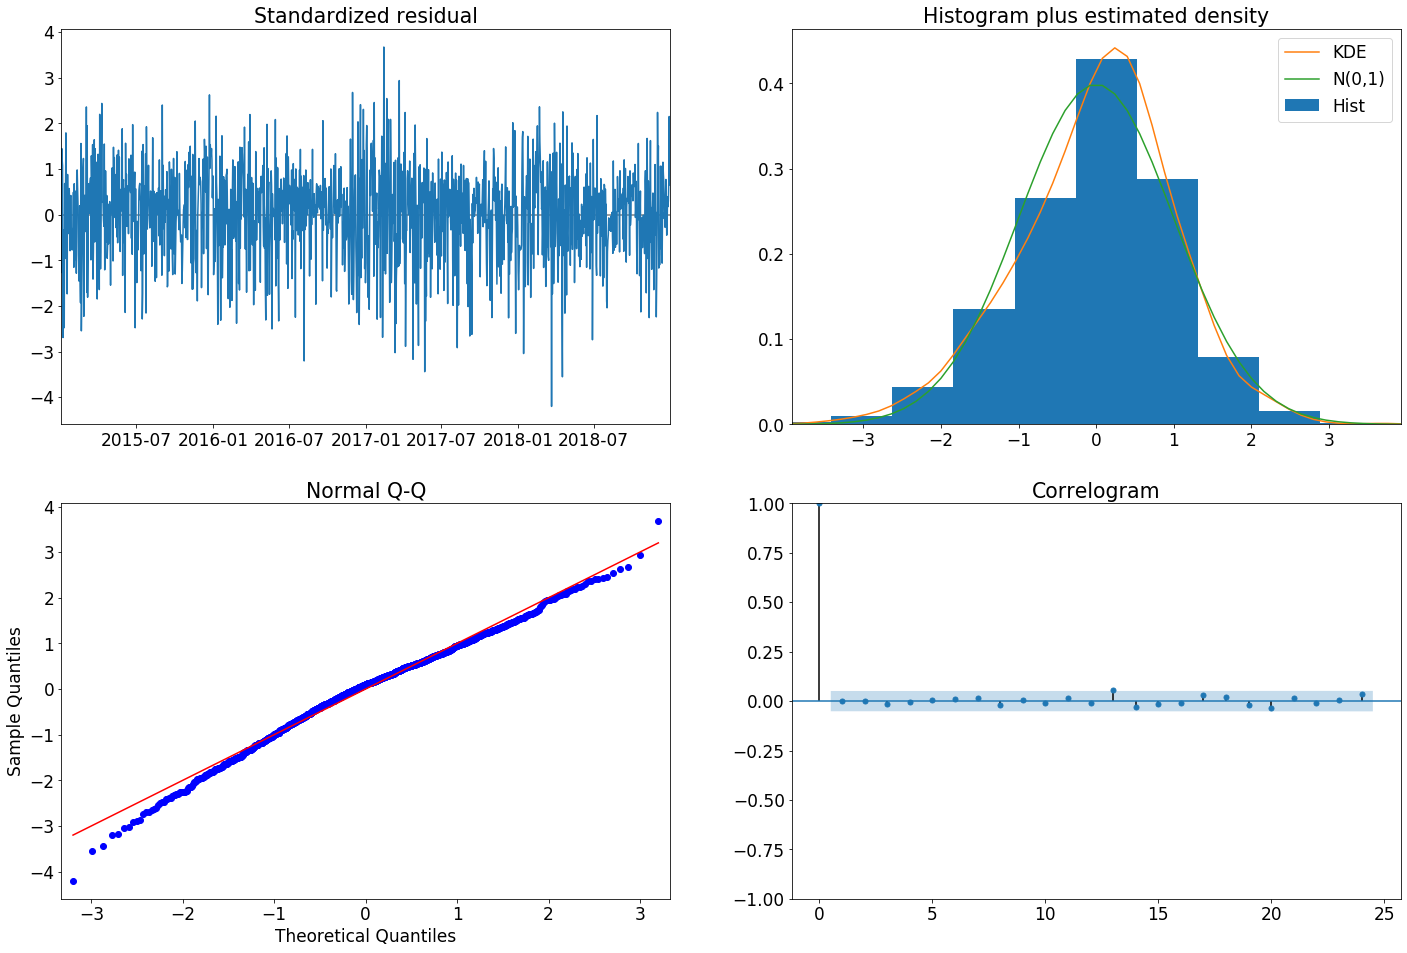

In [ ]:
arima_temp.plot_diagnostics(lags=24, figsize=(24,16))
plt.rcParams.update({'font.size': 17})
plt.savefig('Temp_Diagnostics.png')

## FaceBook "Prophet" Model
In addition, a model was created using FaceBook "Prophet" (which was also mentioned by the lab). 

pip install pystan

pip install fbprophet

In [ ]:
from fbprophet import Prophet
plt.rcParams['figure.figsize'] = [14, 4]

Prepare the training data for "Prophet".

In [ ]:
prophet_train = temp_train.to_frame()
prophet_train.rename(columns={"USGS:03512000:00010:00000":"y"},inplace=True)

In [ ]:
prophet_train['ds']=prophet_train.index.date

In [ ]:
prophet_train.reset_index(inplace=True)

In [ ]:
prophet_train.drop(columns=['datetimeUTC'], inplace=True)

In [ ]:
prophet_train = prophet_train[['ds','y']]

In [ ]:
temp_prophet = Prophet()
temp_prophet.fit(prophet_train)

"Prophet" requires a blank dataframe to input predictions

In [ ]:
future = temp_prophet.make_future_dataframe(periods=731)
print(future.head())
print(future.tail())

          ds
0 2015-01-01
1 2015-01-02
2 2015-01-03
3 2015-01-04
4 2015-01-05
             ds
2187 2020-12-27
2188 2020-12-28
2189 2020-12-29
2190 2020-12-30
2191 2020-12-31


In [ ]:
forecast = temp_prophet.predict(future)
print(forecast.columns)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


,ds,yhat,yhat_lower,yhat_upper
2187,2020-12-27,6.063925,3.111827,9.157035
2188,2020-12-28,5.887096,2.902527,8.695758
2189,2020-12-29,5.722911,2.887328,8.763313
2190,2020-12-30,5.718098,2.532952,8.808520
2191,2020-12-31,5.644826,2.558687,8.515957


### Collecting all the forecast.

In [ ]:
fbprophet_forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(731)
fbprophet_forecast.set_index(temp_test.index, inplace=True)

In [ ]:
# Forecast 365 days ahead
y_forecast_tbats = tbats_model.forecast(steps=731)

In [ ]:
y_forecast_arima = arima_temp.forecast(731, exog=exog_temp_to_test)

In [ ]:
temp_c = pd.DataFrame(temp_test)
temp_c['Predictions by TBATS'] = y_forecast_tbats
temp_c['Predictions by ARIMA'] = y_forecast_arima
temp_c['Predictions by FB prophet'] = fbprophet_forecast['yhat']

In [ ]:
temp_c.rename(columns={"USGS:03512000:00010:00000":"Actual"},inplace=True)

## Evaluation

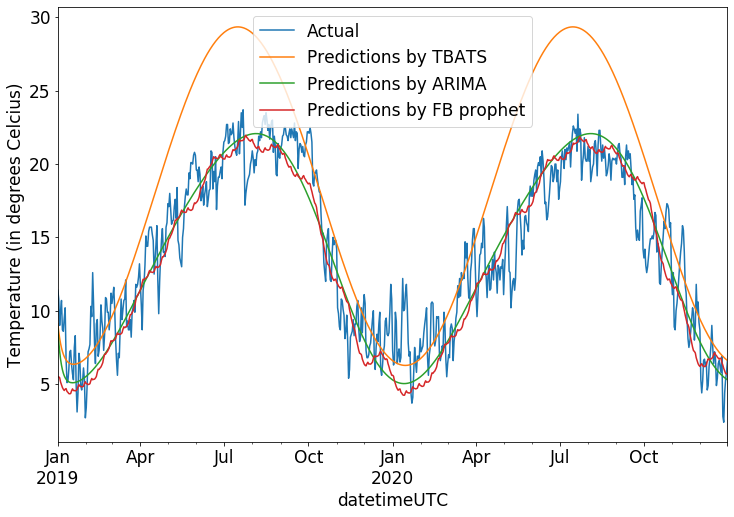

In [ ]:
ver_plot = temp_c.plot(figsize=(12,8))
plt.ylabel('Temperature (in degrees Celcius)')
plt.savefig('Daily_Temperature_Prediction_Verification_Plot.png')

In [ ]:
print('MAE TBATS:', mean_absolute_error(temp_test, y_forecast_tbats))
print('MAE ARIMA:', mean_absolute_error(temp_test, y_forecast_arima))
print('MAE FB prophet:', mean_absolute_error(temp_test, temp_c['Predictions by FB prophet']))

MAE TBATS: 4.2457209605940704
MAE ARIMA: 1.706721617922476
MAE FB prophet: 1.8254640434277893


## Future Directions
The next step of this project is to model the instant data measured with 15 minute-intervals. Since the instant data model is too complicated for ARIMA models, the machine learning approah may provide good assistance for this goal. 

## Discussion and Conclusion
### The yearly water temperature of the Oconaluftee River stays relatively constant each year
Our models assume a constant zero trend in the data, which produces good forecasts with a period of two years. The previous run-sequence plot and the yearly distribution plots also confirms the assumption of constant yearly mean temperature. With the highest temperature always below 32 degrees Celcius, the water temperatures of Oconaluftee River in the past 6 years are considered healthy.

### The ARIMA Model with Fourier terms is recommended as the genral daily water temperature prediction model
According the the metric Mean Absolute Error and the verification plot, we can see that the ARIMA model with two Fourier terms provides the most accurate predictions. The ARIMA model in general has significant advantages over the other two methods. For example, the SARIMAX model (a derivation of the ARIMA model) supports exogenous variables, which is helpful for modeling complicated relationships. The ARIMA models are also relatively easier to understand and interpret. 

Diiferent from ARIMA, FaceBook Prophet also provides the forecast error range, which may provide more insights for accurate forecasts. 

# References

CMANN Links & Glossary. (n. d.). City of Charlotte.
https://charlottenc.gov/StormWater/SurfaceWaterQuality/Pages/CMANN
LinksGlossary.aspx

Nau, R. (2014, September 13). Introduction to ARIMA: nonseasonal models.
Statistical forecasting: notes on regression and time series analysis.
https://people.duke.edu/~rnau/411arim.htm#mixed

Skorupa, G. (2019, January 14). Forecasting Time Series with Multiple
Seasonalities using TBATS in Python. Medium.
https://medium.com/intive-developers/forecasting-time-series-with-
multiple-seasonalities-using-tbats-in-python-398a00ac0e8a